In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import csv
import requests
import dateutil.parser

In [386]:
def get_data(exchange, symbol):
    try:
        url = "https://web3api.io/api/v2/market/ohlcv/"+symbol+"/historical"
        querystring = {"exchange":exchange,"timeInterval":"days","timeFormat":"iso","format":"csv","fields":"timestamp,open,high,low,close,volume","startDate":"1577922772","endDate":"1586044372"}
        #print(url, querystring)
        headers = {'x-api-key': 'UAK762d0495e19dd4b269a1b32eaf753ae8'}
        response = requests.request("GET", url, headers=headers, params=querystring)
        return (response.text)
    
    except Exception as e:
        raise e

In [387]:
# Read market data from the get_data() function
from io import StringIO
btc = pd.read_csv(StringIO(get_data("gdax","btc_usd")),index_col='timestamp',parse_dates=True)
eth = pd.read_csv(StringIO(get_data("gdax","eth_usd")),index_col='timestamp',parse_dates=True)
xrp = pd.read_csv(StringIO(get_data("gdax","xrp_usd")),index_col='timestamp',parse_dates=True)
bch = pd.read_csv(StringIO(get_data("gdax","bch_usd")),index_col='timestamp',parse_dates=True)
link = pd.read_csv(StringIO(get_data("gdax","link_usd")),index_col='timestamp',parse_dates=True)
ltc = pd.read_csv(StringIO(get_data("gdax","ltc_usd")),index_col='timestamp',parse_dates=True)
eos = pd.read_csv(StringIO(get_data("gdax","eos_usd")),index_col='timestamp',parse_dates=True)
xtz = pd.read_csv(StringIO(get_data("gdax","xtz_usd")),index_col='timestamp',parse_dates=True)
xlm = pd.read_csv(StringIO(get_data("gdax","xlm_usd")),index_col='timestamp',parse_dates=True)
dash = pd.read_csv(StringIO(get_data("gdax","dash_usd")),index_col='timestamp',parse_dates=True)

In [388]:
btc.head()

,open,high,low,close,volume
timestamp,,,,,
2020-01-01,7177.55,7177.58,7173.45,7174.33,15.226125
2020-01-02,7174.33,7186.18,6903.00,6945.02,8010.927387
2020-01-03,6945.02,7401.20,6854.67,7334.45,14056.392385
2020-01-04,7334.45,7398.00,7263.32,7348.63,4742.466210
2020-01-05,7348.63,7488.87,7312.22,7355.40,5942.014946


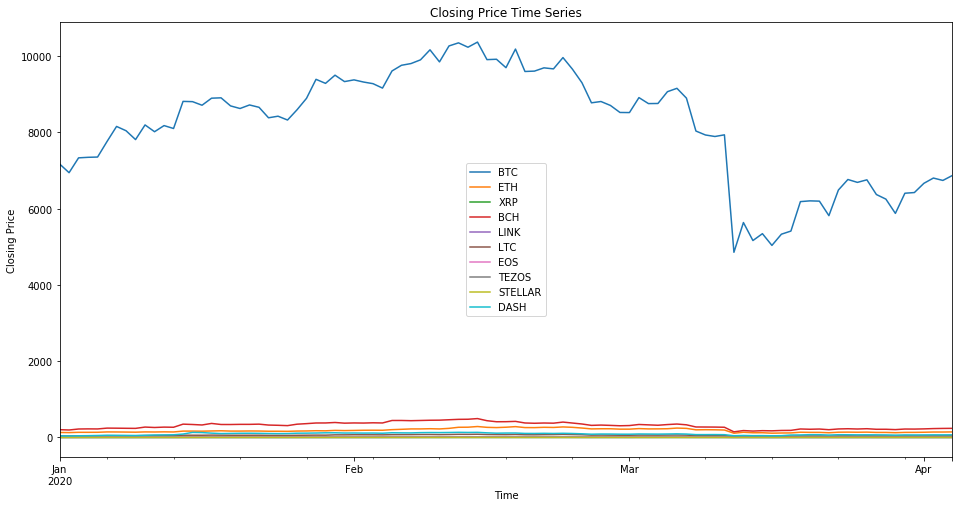

In [389]:
btc['close'].plot(label='BTC')
eth['close'].plot(label='ETH',figsize=(16,8))
xrp['close'].plot(label='XRP')
bch['close'].plot(label='BCH')
link['close'].plot(label='LINK')
ltc['close'].plot(label='LTC')
eos['close'].plot(label='EOS')
xtz['close'].plot(label='TEZOS')
xlm['close'].plot(label='STELLAR')
dash['close'].plot(label='DASH')
plt.ylabel('Closing Price')
plt.xlabel('Time')
plt.title('Closing Price Time Series')
plt.legend()

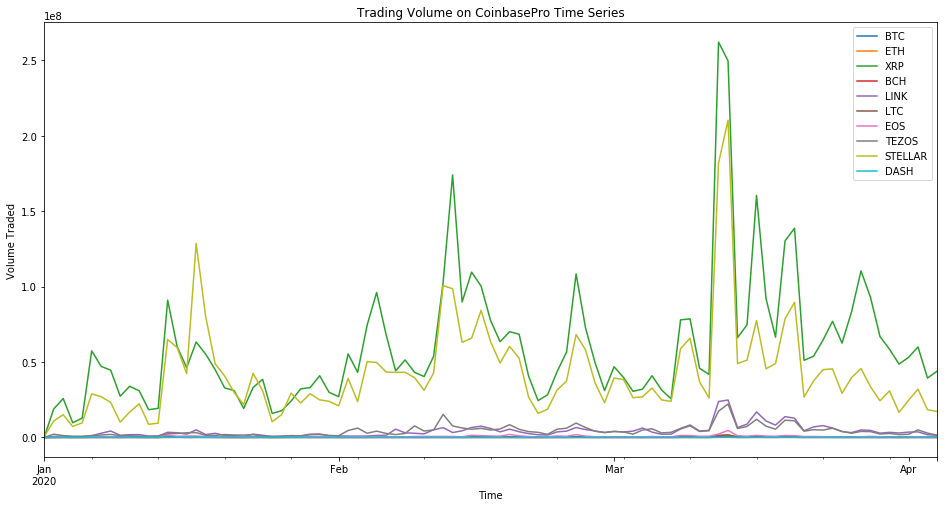

In [357]:
btc['volume'].plot(label='BTC',figsize=(16,8),title='Daily Volume Traded')
eth['volume'].plot(label='ETH')
xrp['volume'].plot(label='XRP')
bch['volume'].plot(label='BCH')
link['volume'].plot(label='LINK')
ltc['volume'].plot(label='LTC')
eos['volume'].plot(label='EOS')
xtz['volume'].plot(label='TEZOS')
xlm['volume'].plot(label='STELLAR')
dash['volume'].plot(label='DASH')
plt.ylabel('Volume Traded')
plt.xlabel('Time')
plt.title('Trading Volume on CoinbasePro Time Series')
plt.legend()

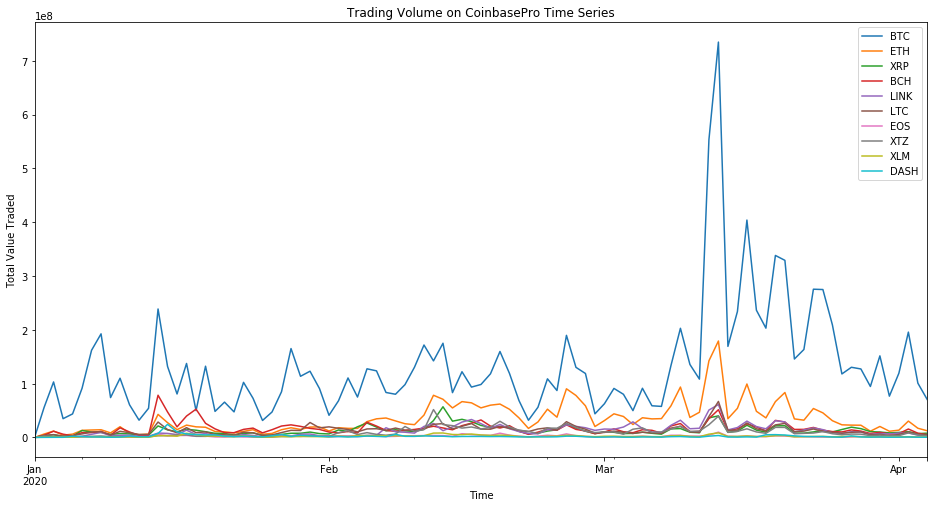

In [390]:
# Create a new column for each dataframe "Total Traded" close Price * Volume Traded
btc['Total Traded'] = btc['close']*btc['volume']
eth['Total Traded'] = eth['close']*eth['volume']
xrp['Total Traded'] = xrp['close']*xrp['volume']
bch['Total Traded'] = bch['close']*bch['volume']
link['Total Traded'] = link['close']*link['volume']
ltc['Total Traded'] = ltc['close']*ltc['volume']
eos['Total Traded'] = eos['close']*eos['volume']
xtz['Total Traded'] = xtz['close']*xtz['volume']
xlm['Total Traded'] = xlm['close']*xlm['volume']
dash['Total Traded'] = dash['close']*dash['volume']

# Plot the Total Traded Value per day
btc['Total Traded'].plot(label='BTC',figsize=(16,8))
eth['Total Traded'].plot(label='ETH')
xrp['Total Traded'].plot(label='XRP')
bch['Total Traded'].plot(label='BCH')
link['Total Traded'].plot(label='LINK')
ltc['Total Traded'].plot(label='LTC')
eos['Total Traded'].plot(label='EOS')
xtz['Total Traded'].plot(label='XTZ')
xlm['Total Traded'].plot(label='XLM')
dash['Total Traded'].plot(label='DASH')

plt.ylabel('Total Value Traded')
plt.xlabel('Time')
plt.title('Trading Volume on CoinbasePro Time Series')
plt.legend()

In [391]:
# Calculate the daily percent change for each of these assets and append to thier dataframes
btc['returns'] = btc['close'].pct_change(1)
eth['returns'] = eth['close'].pct_change(1)
xrp['returns'] = xrp['close'].pct_change(1)
bch['returns'] = bch['close'].pct_change(1)
link['returns'] = link['close'].pct_change(1)
ltc['returns'] = ltc['close'].pct_change(1)
eos['returns'] = eos['close'].pct_change(1)
xtz['returns'] = xtz['close'].pct_change(1)
xlm['returns'] = xlm['close'].pct_change(1)
dash['returns'] = dash['close'].pct_change(1)

In [392]:
# Which day did each asset generate the largest percent return?
assets = [btc, eth, xrp, bch, link, ltc, eos, xtz, xlm, dash]
btc.name ="BTC"
eth.name ="ETH"
xrp.name ="XRP"
bch.name ="BCH"
link.name ="LINK"
ltc.name ="LTC"
eos.name ="EOS"
xtz.name ="XTZ"
xlm.name ="XLM"
dash.name ="DASH"

for asset in assets:
  print(asset.name +": ", asset['returns'].argmax())


BTC:  2020-03-13 00:00:00
ETH:  2020-03-13 00:00:00
XRP:  2020-03-13 00:00:00
BCH:  2020-01-14 00:00:00
LINK:  2020-02-11 00:00:00
LTC:  2020-03-13 00:00:00
EOS:  2020-01-14 00:00:00
XTZ:  2020-03-13 00:00:00
XLM:  2020-03-13 00:00:00
DASH:  2020-01-15 00:00:00


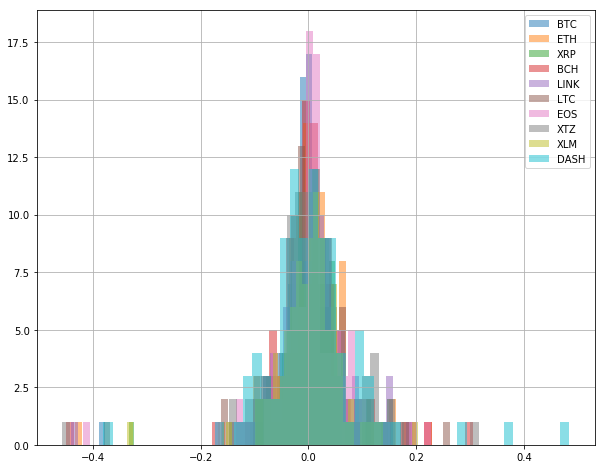

In [393]:
# which assest is more volatile using dist of daily returns
assets = [btc, eth, xrp, bch, link, ltc, eos, xtz, xlm, dash]
for asset in assets:
   asset['returns'].hist(bins=50,label=asset.name,figsize=(10,8),alpha=0.5)
   plt.legend()

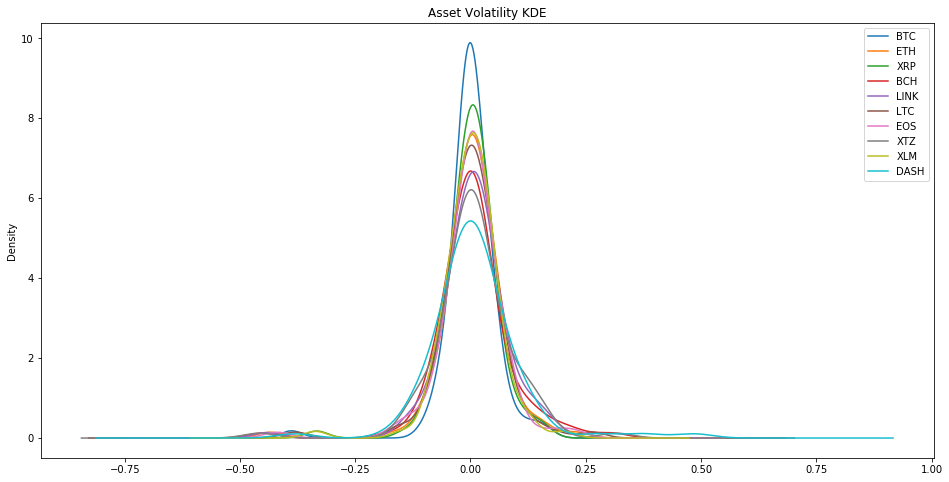

In [394]:
# Which assest is more volatile using KDE of daily returns
assets = [btc, eth, xrp, bch, link, ltc, eos, xtz, xlm, dash]
for asset in assets:
    asset['returns'].plot(kind='kde',label=asset.name,figsize=(16,8))
    plt.title('Asset Volatility KDE')
    plt.legend()

In [395]:
# Calculate the cumulative returns for each assets and add a colum to our data frame
assets = [btc, eth, xrp, bch, link, ltc, eos, xtz, xlm, dash]
for asset in assets:
    asset['Cumulative Return'] = (1 + asset['returns']).cumprod()

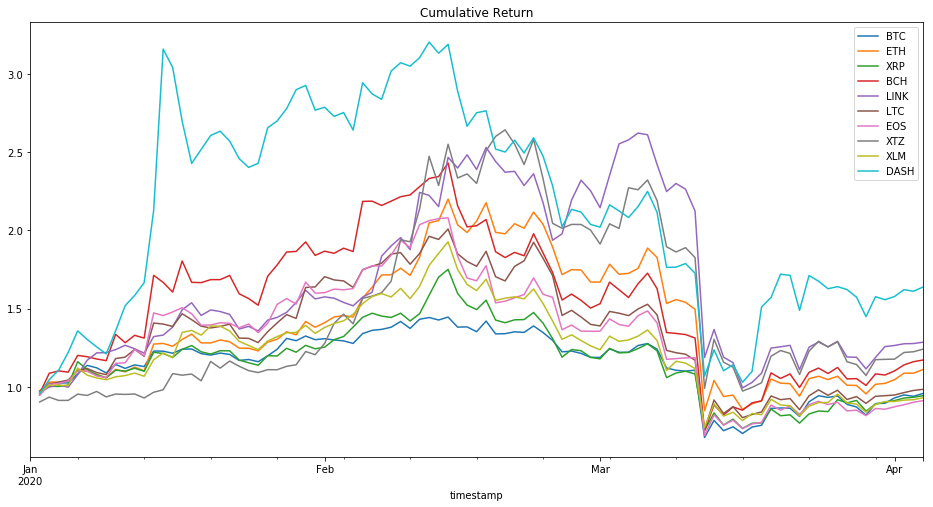

In [396]:
# Which gave the best cumulative returns?
for asset in assets:
    asset['Cumulative Return'].plot(label=asset.name,figsize=(16,8),title='Cumulative Return')
    plt.legend()

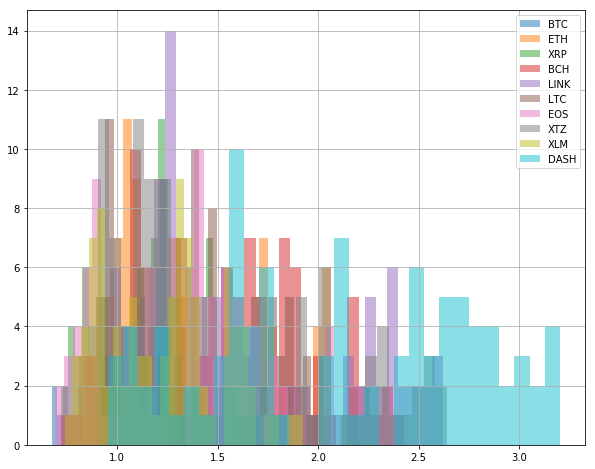

In [418]:
# Calculate the normalized return for each asset in the portfolio
for asset in assets:
    asset['Normed Return'] = asset['close']/asset.iloc[0]['close']
    asset['Normed Return'].hist(bins=30,label=asset.name,figsize=(10,8),alpha=0.5)
    plt.legend()

In [422]:
# Average Daily Return
for asset in assets:
    asset['Daily Return'] = asset['Cumulative Return'].pct_change(1)

In [423]:
# Sharpe ratio 
# Risk free rate of return is now 0!
for asset in assets:
    asset['Sharpe Ratio'] = (asset['Daily Return'].mean() / asset['Daily Return'].std())*(252**.05)

In [424]:
for asset in assets:
    print(asset.name, asset['Sharpe Ratio'].max())

BTC 0.0417458164048
ETH 0.0802211673481
XRP 0.0360726153577
BCH 0.0947318957097
LINK 0.110770940855
LTC 0.0582969013541
EOS 0.0469301421627
XTZ 0.114884528763
XLM 0.0369529043373
DASH 0.139121859031
